**KNN - Marco Patiño and Armando Rodríguez**


In [ ]:
!pip install --upgrade --quiet eli5 

In [ ]:
import pandas as pd
import sklearn.neighbors as nb   # KNN
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing, metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
import eli5
from numpy.random import choice
from sklearn.inspection import permutation_importance


### Dataset

In [ ]:
random_state=10000

In [ ]:
df = pd.read_csv('botNoBot2018_preprocessed.csv',lineterminator='\n')
df.shape

(10991, 13)

In [ ]:
Y = df["category"]
X = df.drop(columns="category", axis=1);

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True, stratify=Y,random_state=random_state);

In [ ]:
scaler = preprocessing.Normalizer().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Model

In [ ]:
params = {'n_neighbors': [x for x in range(5,40,2)], 'weights': ['distance','uniform'], 
          'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

knn = nb.KNeighborsClassifier(p=3)
gknn = GridSearchCV(knn, params, cv=5, scoring='accuracy', verbose=100)
gknn.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 1/5; 1/144] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.833 total time=   0.0s
[CV 2/5; 1/144] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 2/5; 1/144] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.841 total time=   0.0s
[CV 3/5; 1/144] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 3/5; 1/144] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.857 total time=   0.0s
[CV 4/5; 1/144] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 4/5; 1/144] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5; 1/144] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 5/5; 1/144] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.844 total time=   0.0s
[CV 1/5; 2/144] S

GridSearchCV(cv=5, estimator=KNeighborsClassifier(p=3),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy', verbose=100)

### Interpretability

In [ ]:
print(classification_report(gknn.predict(Xtest), Ytest,target_names=['human', 'bot']))

              precision    recall  f1-score   support

       human       0.83      0.84      0.83      1064
         bot       0.85      0.84      0.84      1135

    accuracy                           0.84      2199
   macro avg       0.84      0.84      0.84      2199
weighted avg       0.84      0.84      0.84      2199



In [ ]:
pred = gknn.predict(Xtest)
print("\nAccuracy on test set: ", metrics.accuracy_score(Ytest, pred))


Accuracy on test set:  0.8371987266939518


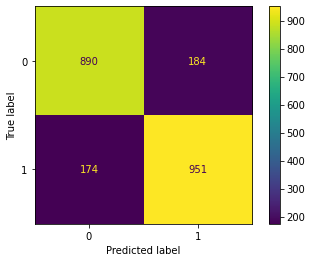

In [ ]:
ConfusionMatrixDisplay.from_estimator(gknn, Xtest,Ytest)

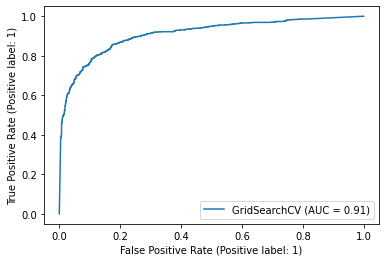

In [ ]:
RocCurveDisplay.from_estimator(gknn, Xtest,Ytest, pos_label=1)

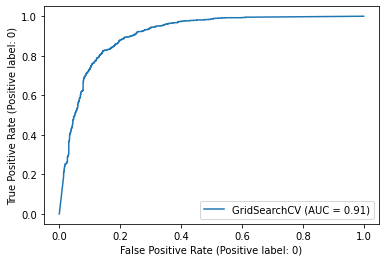

In [ ]:
RocCurveDisplay.from_estimator(gknn, Xtest,Ytest, pos_label=0)

In [ ]:
c = choice(Xtest.shape[0], size=2000, replace=False)
pi = permutation_importance(gknn,Xtest[c], Ytest.to_numpy()[c], n_jobs=-1, random_state=0)
var_imp = pd.DataFrame({'importance': pi.importances_mean}, index=X.columns)

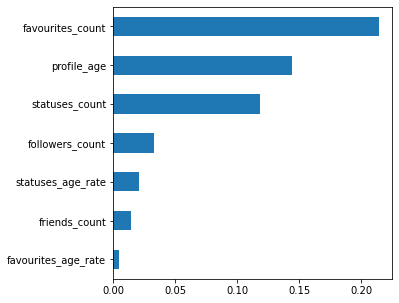

In [ ]:
var_imp.sort_values(by='importance')[5:].plot.barh(figsize=(5,5),
                                               legend=False);

In [ ]:
print('Best params ',gknn.best_params_)
print('Best cv score ', gknn.best_score_)
print('Test accuracy ', gknn.score(Xtest,Ytest))
pred = gknn.predict(Xtest)
print("\nConfusion matrix on test set:\n", metrics.confusion_matrix(Ytest, pred))

Best params  {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'distance'}
Best cv score  0.8537316618385795
Test accuracy  0.8371987266939518

Confusion matrix on test set:
 [[890 184]
 [174 951]]
